In [12]:
sun = pd.read_csv("234\\sonne.txt", sep="\t", header=None, decimal=",")
glas = pd.read_csv("234\\sonne_glas.txt", sep="\t", header=None, decimal=",", skiprows=[*list(range(17))])
A = pd.DataFrame([sun.iloc[:,0], 1-glas.iloc[:,1]/sun.iloc[:,1]]).transpose()

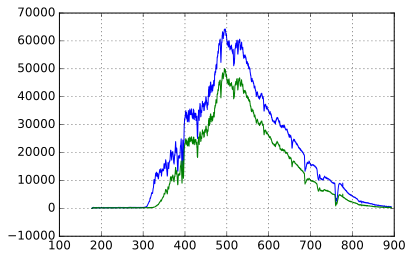

In [13]:
figure()
plot(sun.iloc[:,0],sun.iloc[:,1])
plot(glas.iloc[:,0],glas.iloc[:,1])
grid()
show()

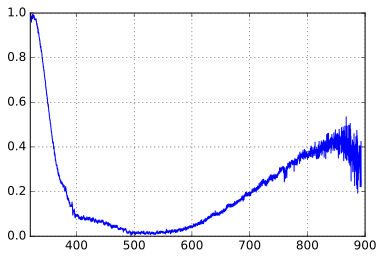

In [67]:
A_norm = (A.loc[A[0] > 320,1] - A.loc[A[0] > 320,1].min())/(A.loc[A[0] > 320,1].max() - A.loc[A[0] > 320,1].min())
figure()
plot(A.loc[A[0] > 320,0],A_norm)
xlim((320,900))
ylim((0,1))
grid()
show()

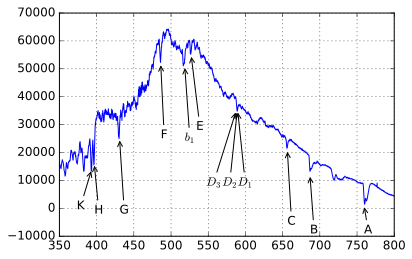

In [66]:
figure()
plot(sun.iloc[:,0], sun.iloc[:,1])
xlim((350,800))
grid()
annotate('A', xy=(759.4, 1100), xycoords='data',
              xytext=(759.4,-9000), textcoords='data',
              arrowprops=dict(arrowstyle="->"))
annotate('B', xy=(686.7, 12000), xycoords='data',
              xytext=(686.7,-9000), textcoords='data',
              arrowprops=dict(arrowstyle="->"))
annotate('C', xy=(656.3, 21000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_1$', xy=(589.6, 35000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_2$', xy=(589.0, 35000), xycoords='data',
              xytext=(-15,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$D_3$', xy=(587.6, 35000), xycoords='data',
              xytext=(-30,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('E', xy=(527.0, 55000), xycoords='data',
              xytext=(5,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('$b_1$', xy=(518.4, 51000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('F', xy=(486.1, 52000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('G', xy=(430.8, 25000), xycoords='data',
              xytext=(0,-75), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('H', xy=(396.8, 16000), xycoords='data',
              xytext=(0,-50), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))
annotate('K', xy=(393.4, 14000), xycoords='data',
              xytext=(-15,-40), textcoords='offset points',
              arrowprops=dict(arrowstyle="->"))

show()

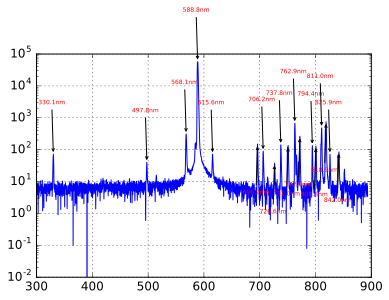

In [222]:
na_hi_raw = pd.read_csv("234\\Na_D.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_hi = na_hi_raw.loc[na_hi_raw[0] > 300]
na_hi[1] = na_hi[1] + abs(na_hi[1].min())

from detect_peaks import detect_peaks
pind = detect_peaks(na_hi[1], mph=30, mpd=30)
pind = delete(pind, [3,5])

figure()
# scatter(na_hi.iloc[pind,0], na_hi.iloc[pind,1])
plot(na_hi.iloc[:,0], na_hi.iloc[:,1], 'b-')
yscale('log')
xlim((300,900))
for i in range(5):
    annotate("{0:.1f}nm".format(na_hi.iloc[pind[i],0]), xy=(na_hi.iloc[pind[i],0],na_hi.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50),
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
for i in range(5,len(pind)):
    annotate("{0:.1f}nm".format(na_hi.iloc[pind[i],0]), xy=(na_hi.iloc[pind[i],0],na_hi.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**i),
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
show()
# display(pd.DataFrame(na_hi.iloc[pind,0].values, index=range(18), columns=['Wellenlänge $[nm]$']))

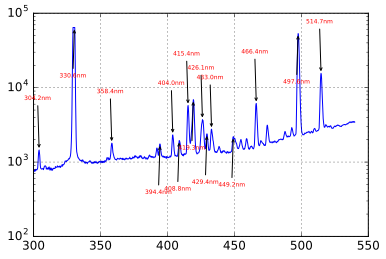

In [291]:
na_li_raw1 = pd.read_csv("234\\Na_kleineIntensität.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_li1_ = na_li_raw1.loc[na_li_raw1[0] >= 300]
na_li1 = na_li1_.loc[na_li1_[0] <= 540]
na_li1[1] = na_li1[1] + abs(na_li1[1].min())

pind = detect_peaks(na_li1.loc[na_li1[0]<452,1], mph=1400, mpd=10)
pind = delete(pind,[3,12,13])
pind = append(pind, detect_peaks(na_li1.loc[na_li1[0]>=452,1],
                                 mph=4000, mpd=10)+na_li1.index.get_loc(na_li1.loc[na_li1[0]>=452,1].index.min()))

figure()
# scatter(na_li1.iloc[pind,0], na_li1.iloc[pind,1])
plot(na_li1[0], na_li1[1], 'b-')
yscale('log')
for i in range(len(pind)):
    annotate("{0:.1f}nm".format(na_li1.iloc[pind[i],0]), xy=(na_li1.iloc[pind[i],0],na_li1.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**i),
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
show()

In [293]:
na_li_raw2 = pd.read_csv("234\\Na_kleineIntensität600850.txt", sep="\t", header=None, decimal=",", skiprows=17)
na_li2_ = na_li_raw2.loc[na_li_raw2[0] >= 600]
na_li2 = na_li2_.loc[na_li2_[0] <= 850]
na_li2[1] = na_li2[1] + abs(na_li2[1].min())

pind = detect_peaks(na_li2[1], mph=3000, mpd=30)
pind = delete(pind,[0,2,3,4])

figure()
scatter(na_li2.iloc[pind,0], na_li2.iloc[pind,1])
plot(na_li2[0], na_li2[1], 'b-')
yscale('log')
for i in range(len(pind)):
    annotate("{0:.1f}nm".format(na_li2.iloc[pind[i],0]), xy=(na_li2.iloc[pind[i],0],na_li2.iloc[pind[i],1]),
             xycoords='data', color='red', fontsize=6, xytext=(-15, 50*(-1)**(i+1)),
             textcoords='offset points',arrowprops=dict(arrowstyle="->"))
grid()
show()